# Hierarchical Clustering

# Insert Packages

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Import the whiten function
from scipy.cluster.vq import whiten

# Import Dataset

In [29]:
from urllib.request import urlretrieve

# Set the source of the dataset
fifa_data_set_link = "https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv"

# Set where the dataset will be locally stored after downloaded
fifa_import_path = 'dataset/input/original/fifa_full.csv'

# Retrieve file from the web
urlretrieve(fifa_data_set_link, fifa_import_path)

# Read file as a dataframe
fifa = pd.read_csv(fifa_import_path, nrows= 5000)

# Only take 5000 rows

In [32]:
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


# Normalized Values

In [33]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.967671,3.723843
1,26,48,1.093889,2.837214
2,33,56,1.388398,3.310083
3,38,78,1.598762,4.610472
4,11,29,0.462799,1.714150


# Calculate Distance Matrix

This will calculate the distance between each row using the ward method

In [34]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 
                          method='ward')
distance_matrix

array([[0.00000000e+00, 1.99600000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.01000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.25000000e+02, 2.22400000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.98500000e+03, 9.99400000e+03, 2.65439840e+01, 2.74000000e+03],
       [9.99100000e+03, 9.99500000e+03, 5.66180674e+01, 2.26000000e+03],
       [9.99600000e+03, 9.99700000e+03, 1.12024179e+02, 5.00000000e+03]])

# Cluster

In [39]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# 3 = Assign data points to 3 different clusters

fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression,cluster_labels
0,23,63,0.967671,3.723843,3
1,26,48,1.093889,2.837214,3
2,33,56,1.388398,3.310083,3
3,38,78,1.598762,4.610472,3
4,11,29,0.462799,1.714150,2


In [36]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.986331           4.354148
2                            0.740142           1.938290
3                            1.341895           3.622458


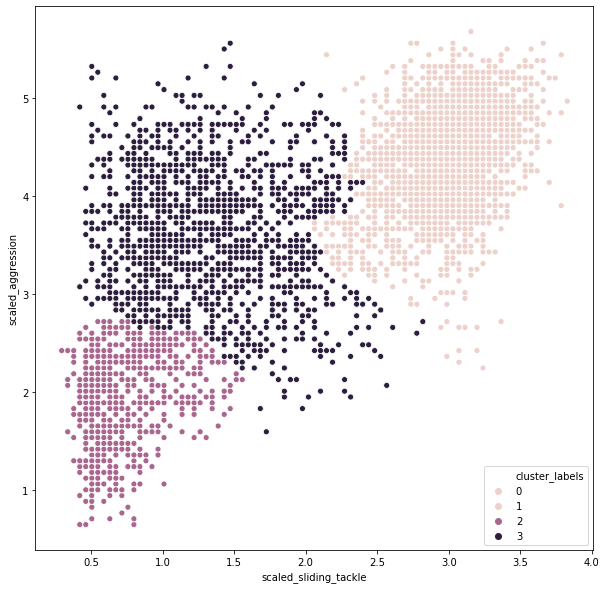

In [41]:
# Create a scatter plot through seaborn
plt.figure(figsize=(10,10))
sns.scatterplot(x='scaled_sliding_tackle', 
                y='scaled_aggression', 
                hue='cluster_labels', 
                data=fifa)
plt.show()